<a href="https://www.kaggle.com/code/achopra20/potholes-detection-using-yolo-model?scriptVersionId=282884066" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pothole Detection Using YOLO Model

## Load required libraries 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

## List all input files

In [1]:
# include dataset, videos and images that require for testing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pothole-videoo/Car_Driving_Over_Potholes_Video.mp4
/kaggle/input/pothole-detection-dataset/MWPDD/data.yaml
/kaggle/input/pothole-detection-dataset/MWPDD/valid/labels.cache
/kaggle/input/pothole-detection-dataset/MWPDD/valid/labels/448_jpg.rf.bf81699ab22dffa215439d7f558051e4.txt
/kaggle/input/pothole-detection-dataset/MWPDD/valid/labels/IMG_1892_MOV-0362_jpg.rf.7ffaff288191e0ee1e56a2b4e6ccc8cd.txt
/kaggle/input/pothole-detection-dataset/MWPDD/valid/labels/img-108_jpg.rf.11e98cb5639b13b4b69ecc10da93e8fb.txt
/kaggle/input/pothole-detection-dataset/MWPDD/valid/labels/382_jpg.rf.3fce7d1ba79ff23b04ba108c34754b4c.txt
/kaggle/input/pothole-detection-dataset/MWPDD/valid/labels/img-249_jpg.rf.667fda0a35cba6449607c82479a538a2.txt
/kaggle/input/pothole-detection-dataset/MWPDD/valid/labels/600_jpg.rf.f7a3e4c8fab3b49f46d9832ec21c229f.txt
/kaggle/input/pothole-detection-dataset/MWPDD/valid/labels/img-279_jpg.rf.e15ded3d27b38adb1ba643b748b39a47.txt
/kaggle/input/pothole-detection-dataset

## Check dataset type and annotation types

In [2]:
import os, glob, json, xml.etree.ElementTree as ET

ROOT = "/kaggle/input/pothole-detection-dataset"  # change to your slug
print("Some files:", sorted(os.listdir(ROOT))[:20])

# Check common annotation types
xmls = glob.glob(f"{ROOT}/**/*.xml", recursive=True)
txts = glob.glob(f"{ROOT}/**/*.txt", recursive=True)
jsons = glob.glob(f"{ROOT}/**/*.json", recursive=True)

print("XML count:", len(xmls), "TXT count:", len(txts), "JSON count:", len(jsons))


Some files: ['MWPDD']
XML count: 0 TXT count: 3087 JSON count: 0


## Install YOLO framework

In [3]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 79.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Load YOLO base model for fast processing

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')   # start with n or s; n is lighter

## Train YOLO model based on dataset

In [4]:

model.train(data="/kaggle/input/pothole-detection-dataset/MWPDD/data.yaml",
            imgsz=640, epochs=50, batch=16, workers=2,
            optimizer="AdamW", lr0=0.001, cos_lr=True, patience=20)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/input/pothole-detection-dataset/MWPDD/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, in

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        260        573      0.792      0.659      0.747      0.363
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /kaggle/working/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7800845a83d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Find saved trained model directory

In [15]:
import os
print(model.trainer.save_dir)

/kaggle/working/runs/detect/train


## Load trained model and validate on test dataset

In [9]:
best = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

#best val is used for result comparision with ground truth, it uses test data to comparision with trained dataset
metrics = best.val(data="/kaggle/input/pothole-detection-dataset/MWPDD/data.yaml", split="test", imgsz=640)
metrics.box.map50, metrics.box.map

Ultralytics 8.3.233 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 2.4±0.5 ms, read: 9.8±4.6 MB/s, size: 72.9 KB)
val: Scanning /kaggle/input/pothole-detection-dataset/MWPDD/test/labels... 97 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 97/97 152.4it/s 0.6s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/pothole-detection-dataset/MWPDD/test is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 3.2it/s 2.2s0.2s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         97        292      0.763      0.664       0.72      0.372
Speed: 3.6ms preprocess, 5.7ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to /kaggle/working/runs/detect/val3


(0.7198767636409525, 0.3719181322118648)

## Display Confusion Matrix

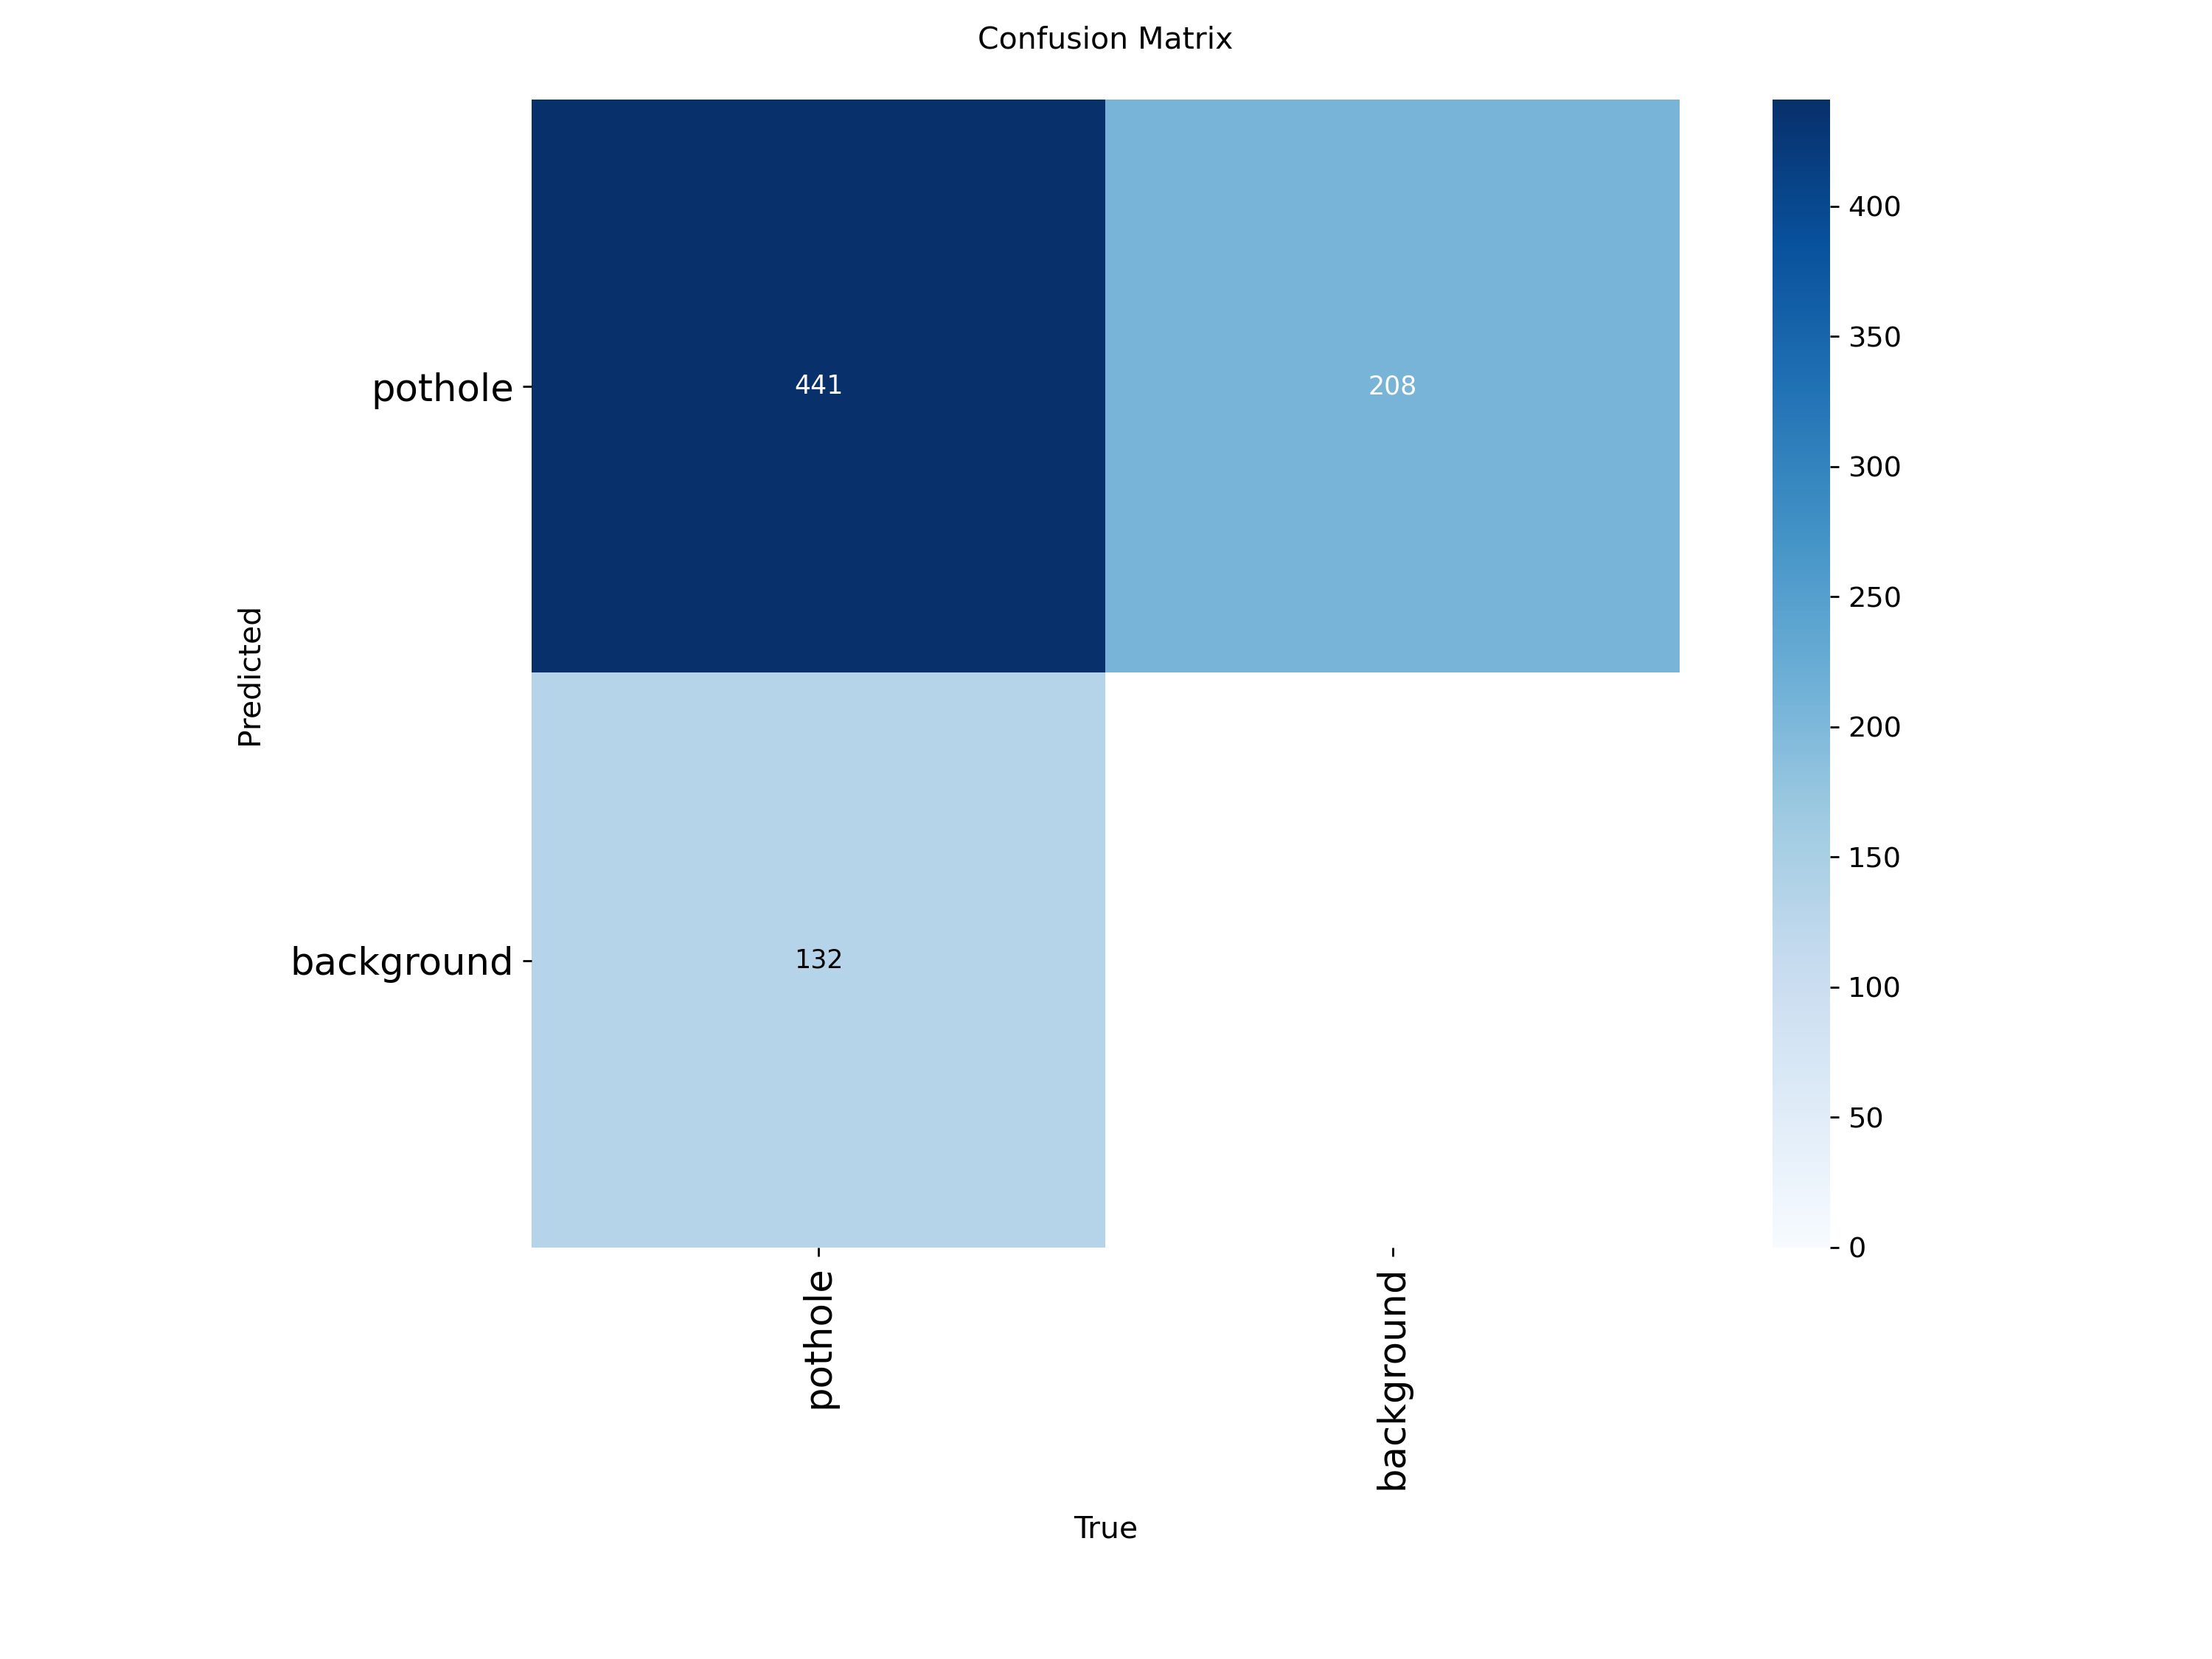

In [17]:
from IPython.display import Image, display

display(Image(filename="/kaggle/working/runs/detect/train/confusion_matrix.png"))

## Find Accuracy based on result

In [19]:
cm = metrics.confusion_matrix.matrix
TP, FP = cm[0]
FN, TN = cm[1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

Accuracy: 0.5266990291262136


## Use real video to detect the pothole

In [16]:
VIDEO_IN  = "/kaggle/input/road-surface/road_surface.mp4"  # input video
VIDEO_OUT = "/kaggle/working/pothole_annotated.mp4" # output saved video

best = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
best.predict(source=VIDEO_IN, conf=0.35, save=True, project="/kaggle/working", name="vidruns", imgsz=640)

# Ultralytics saves annotated video inside /kaggle/working/vidruns/
import glob, shutil, os
cand = glob.glob("/kaggle/working/vidruns/*.mp4")
if cand:
    shutil.copy(cand[0], VIDEO_OUT)
    print("Saved:", VIDEO_OUT)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/680) /kaggle/input/road-surface/road_surface.mp4: 640x384 1 pothole, 8.5ms
video 1/1 (frame 2/680) /kaggle/input/road-surface/road_surface.mp4: 640x384 1 pothole, 6.7ms
video 1/1 (frame 3/680) /kaggle/input/road-surface/road_surface.mp4: 640x384 1 pothole, 6.2ms
video 1/1 (frame 4/680) /kaggle/input/road-surface/road_surface.mp4: 640x384 1 pothole, 7.7ms
video 1/1 (frame 5/680) /kaggle/input/road-surface/road_surface.mp4: 640x384 1 p